In [1]:
from sympy import *
init_printing()
from sympy.plotting import *

# Exercice 1

In [2]:
var('t n')
f, p, sf = symbols('f p sf', cls=Function)

In [3]:
p=Piecewise((1-t/pi, t < pi), (-1+t/pi, t <= 2*pi))
p

⎧  t                 
⎪- ─ + 1   for π > t 
⎪  π                 
⎨                    
⎪ t                  
⎪ ─ - 1   for t ≤ 2⋅π
⎩ π                  

In [4]:
f = lambda t: p.subs(t,t%(2*pi))

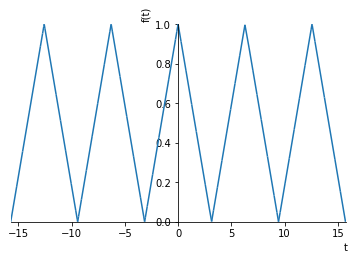

In [6]:
plot(f(t),(t,-5*pi,5*pi))

In [7]:
a0=1/(2*pi)*integrate(p,(t,0,2*pi));a0

In [8]:
an=2/pi*integrate((1-t/pi)*cos(n*t),(t,0,pi));simplify(an)

⎧2⋅(-cos(π⋅n) + 1)                            
⎪─────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎪       2  2                                  
⎨      π ⋅n                                   
⎪                                             
⎪        1                  otherwise         
⎩                                             

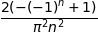

In [9]:
an=2/(pi*n)**2*(1-(-1)**n);an  #Expr de an pour n > 0

Soit donc : $a_n = 0$ pour $n = 2k$ avec $k \ge 1$ et $a_n = \frac{4}{(\pi n)^2}$ pour $n = 2k+1$ avec $k \ge 0$.

Série de Fourier de f :
$sf(t) =\frac{4}{\pi^2} \sum_{k=0}^{+\infty} \frac{cos((2k+1)t}{(2k+1)^2}$

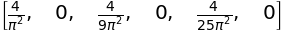

In [9]:
coef=[an.subs(n,k) for k in range(1,7)];coef

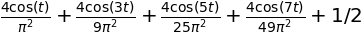

In [10]:
sf=a0+Sum(an*cos(n*t),(n,1,7));
sf.doit()

C:\Users\pasca\Anaconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:232: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


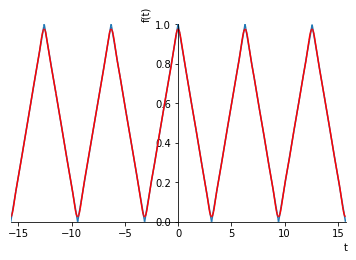

In [11]:
graph=plot(f(t),sf,(t,-5*pi,5*pi),show=false);graph[1].line_color='r';graph.show()

# Exercice 2

In [12]:
var('t')
f, sf = symbols('f sf', cls=Function)

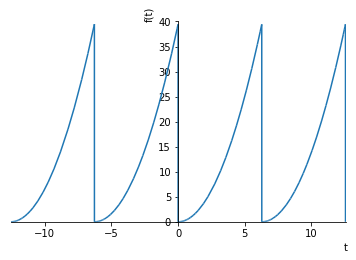

In [13]:
p=t**2
f = lambda t: p.subs(t,t%(2*pi))
plot(f(t),(t,-4*pi,4*pi))

In [14]:
var('n k')
a0=1/(2*pi)*integrate((t**2),(t,0,2*pi))
an=(1/pi)*integrate(t**2*cos(n*t),(t,0,2*pi))
bn=(1/pi)*integrate(t**2*sin(n*t),(t,0,2*pi))

In [15]:
a0,an,bn

⎛      ⎧                        3                                             
⎜      ⎪                     8⋅π                                              
⎜      ⎪                     ────                        for n = 0            
⎜      ⎪                      3                                               
⎜      ⎪                                                            ⎧         
⎜      ⎨   2                                                        ⎪         
⎜      ⎪4⋅π ⋅sin(2⋅π⋅n)   4⋅π⋅cos(2⋅π⋅n)   2⋅sin(2⋅π⋅n)             ⎪     2   
⎜      ⎪─────────────── + ────────────── - ────────────  otherwise  ⎨  4⋅π ⋅co
⎜      ⎪       n                 2               3                  ⎪- ───────
⎜   2  ⎪                        n               n                   ⎪         
⎜4⋅π   ⎩                                                            ⎩         
⎜────, ───────────────────────────────────────────────────────────, ──────────
⎝ 3                                 π               

Pour n entier, les termes en sinus disparaissent. On saisit donc la forme simplifiée suivante ($ \forall n \ge 1 $) :

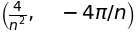

In [16]:
an=4/n**2;bn=-4*pi/n;an,bn

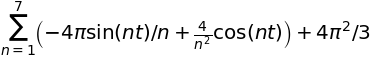

In [17]:
sf=a0+Sum(an*cos(n*t)+bn*sin(n*t),(n,1,7));sf

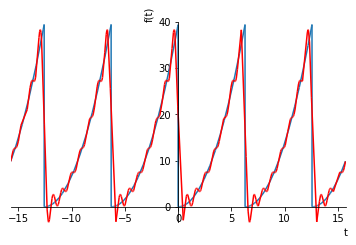

In [18]:
serie=sf.doit()
graph=plot(f(t),serie,(t,-5*pi,5*pi),show=false);graph[1].line_color ='r';graph.show()

La série de Fourier converge vers la régularisée de f (notée $ \tilde f $ ).
En t = 0, elle vaut :

In [19]:
(0+(2*pi)**2)/2

et la série de fourier vaut:

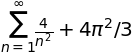

In [20]:
a0+Sum(an,(n,1,oo))

donc $ \sum_{n=1}^{\infty}\frac{1}{n^2} $ vaut :

In [21]:
(2*pi**2-4*pi**2/3)/4

## Utilisation de l'égalité de Parseval

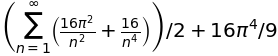

In [22]:
termeGauche=a0**2+Sum(an**2+bn**2,(n,1,oo))/2; termeGauche

In [23]:
termeDroite=1/(2*pi)*integrate(t**4,(t,0,2*pi)); termeDroite

Donc $ 8 \pi^2 \frac{\pi^2}{6}+8 \sum_{n=1}^{\infty}\frac{1}{n^4} =\frac{16\pi^4}{5}-\frac{16\pi^4}{9}$
et donc $\sum_{n=1}^{\infty}\frac{1}{n^4}$ vaut :

In [24]:
(16*pi**4/5-16*pi**4/9-8*pi**4/6)/8

Conclusion : $\sum_{n=1}^{\infty}\frac{1}{n^4} = \frac{\pi^4}{90}$

# Exercice 3

In [25]:
f = lambda t: exp(t%(2*pi))

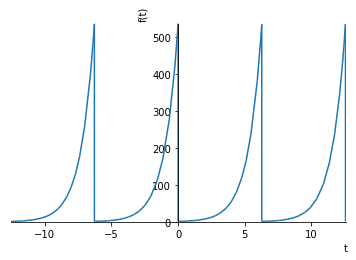

In [26]:
plot(f(t),(t,-4*pi,4*pi))

In [27]:
var('t n')
cn=1/(2*pi)*integrate(exp(t)*exp(-I*n*t),(t,0,2*pi));cn

⎧                                                        2⋅π                  
⎪                                                                             
⎪                     2⋅π                                                     
⎨                ⅈ⋅n⋅ℯ                          ⅈ⋅n                           
⎪─────────────────────────────────────── - ────────────── - ──────────────────
⎪ 2  2⋅ⅈ⋅π⋅n          2⋅ⅈ⋅π⋅n    2⋅ⅈ⋅π⋅n    2                2  2⋅ⅈ⋅π⋅n       
⎩n ⋅ℯ        + 2⋅ⅈ⋅n⋅ℯ        - ℯ          n  + 2⋅ⅈ⋅n - 1   n ⋅ℯ        + 2⋅ⅈ⋅
──────────────────────────────────────────────────────────────────────────────
                                                              2⋅π             

                                        for n = -ⅈ
                                                  
 2⋅π                                              
ℯ                             1                   
───────────────────── + ──────────────  otherwise 
   2⋅ⅈ⋅π⋅n    2⋅ⅈ⋅π⋅n    2       

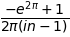

In [28]:
cn=(1-exp(2*pi))/(2*pi*(-1+I*n));cn

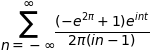

In [29]:
sf=Sum(cn*exp(I*n*t),(n,-oo,oo));sf #Forme complexe de la série de Fourier

In [30]:
c0=cn.subs(n,0);c0

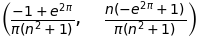

In [31]:
an=cn+cn.subs(n,-n);bn=I*(cn-cn.subs(n,-n));simplify(an),simplify(bn)

Forme trigonométrique de la série de Fourier :

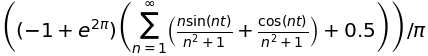

In [32]:
sf=(E**(2*pi)-1)/pi*(1/2+Sum(cos(n*t)/(n**2+1)+n*sin(n*t)/(n**2+1),(n,1,oo)));sf 

C:\Users\admin\Anaconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:232: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


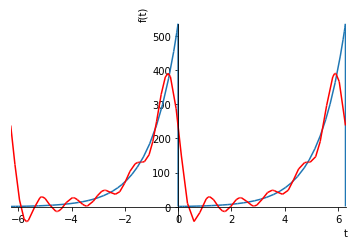

In [33]:
sf5 = Sum(cn*exp(I*n*t),(n,-5,5))
graph=plot(f(t),sf5,(t,-2*pi,2*pi),show=false);graph[1].line_color='r';graph.show()

In [34]:
f0=(1+E**(2*pi))/2
f0

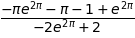

In [35]:
from fractions import *
s = Symbol('s')
sol=solve(f0-(E**(2*pi)-1)/pi*(s+Rational(1,2)),s);sol[0]

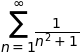

In [36]:
s=Sum(1/(1+n**2),(n,1,oo));s.doit()

In [56]:
s2=(  (1-pi)*E**(2*pi)-pi-1  )  /  ( 2-2*E**(2*pi) );s.evalf(),s2.evalf()

Conclusion : $\sum_{n=1}^{+\infty} \frac{1}{n^2+1} = \frac{(1-\pi)e^{2\pi}-\pi-1  } { 2-2e^{2\pi}  } $

# Exercice 4

In [37]:
p = Piecewise(  (E**t,t<2) ,  (0,t>=2) ); p

⎧ t           
⎪ℯ   for t < 2
⎨             
⎪0   for t ≥ 2
⎩             

In [38]:
f=lambda t: p.subs(t,t%4)

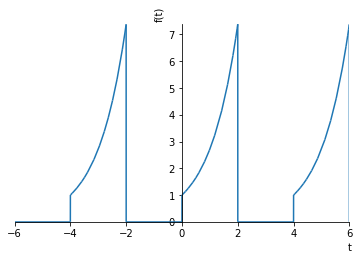

In [39]:
plot(f(t),(t,-6,6))

In [40]:
var('t n k')
cn=1/4*integrate(exp(t)*exp(-I*n*(2*pi/4)*t),(t,0,2));simplify(cn)

⎧                                                                -2⋅ⅈ 
⎪                         0.5                            for n = ─────
⎪                                                                  π  
⎪                                                                     
⎨⎛                  ⅈ⋅π⋅n                    2⎞  -ⅈ⋅π⋅n               
⎪⎝0.5⋅(-ⅈ⋅π⋅n + 2)⋅ℯ      + 0.5⋅(ⅈ⋅π⋅n - 2)⋅ℯ ⎠⋅ℯ                     
⎪──────────────────────────────────────────────────────    otherwise  
⎪                  2  2                                               
⎩                 π ⋅n  + 4⋅ⅈ⋅π⋅n - 4                                 

In [41]:
sf=Sum(cn.subs(n,k)*E**(I*k*2*pi/4*t),(k,-6,6)).doit()

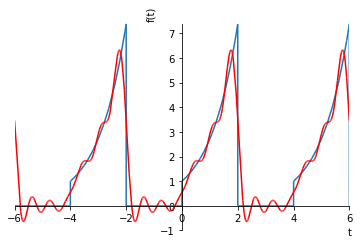

In [42]:
graph=plot(f(t),sf,(t,-6,6),show=False);graph[1].line_color='r';graph.show()

In [43]:
from cmath import *
nu0=1/4
xx= [k*nu0 for k in range(-6,6)]
yy=[abs(cn.subs(n,k))for k in range(-6,6)]
zz=[phase(cn.subs(n,k))for k in range(-6,6)]

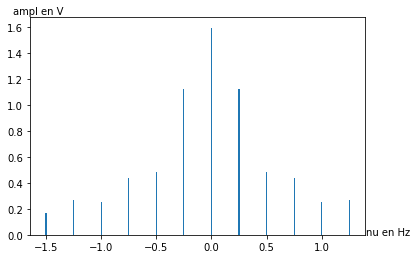

In [44]:
import matplotlib.pyplot as plt
# Spectre en amplitudes
plt.bar(xx,yy,width=0.01)
plt.text(1.4,0,'nu en Hz')
plt.text(-1.8,1.7,'ampl en V')
plt.show()


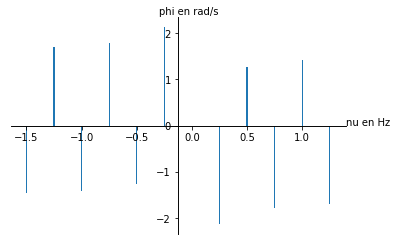

In [45]:
# Spectre en déphasages

# Tracé des axes en centrant sur l'origine
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_position('center')
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')

plt.bar(xx,zz,width=0.01)

plt.text(1.4,0,'nu en Hz')
plt.text(-0.3,2.4,'phi en rad/s')
plt.show()

# Exercice 5

In [71]:
from sympy import *
init_printing()
n,k,t = symbols('n k t')

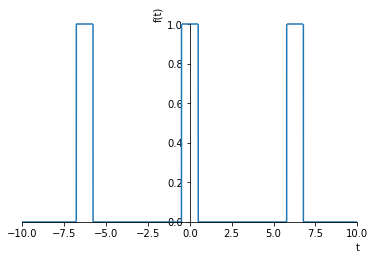

In [72]:
T=2*pi;t0=1
p=Piecewise(  (1/t0,t<t0/2) , (1/t0,t >= T-t0/2) , (0,True) )
f = lambda t: p.subs(t,abs(t)%T)
plot(f(t),(t,-10,10))

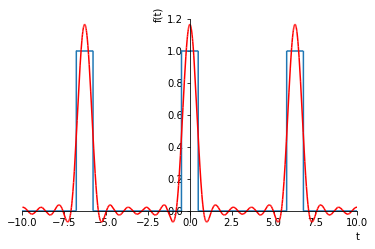

In [73]:
cn=1/T*integrate(1/t0*exp(-I*n*(2*pi/T)*t),(t,-t0/2,t0/2))
sf=Sum(cn.subs(n,k)*E**(I*k*t),(k,-5,5))
graph=plot(f(t),sf.doit(),(t,-10,10),show=False);graph[1].line_color='r';graph.show()

In [74]:
from cmath import *
nu0=1/T
xx= [k*nu0 for k in range(-6,6)]
yy=[abs(cn.subs(n,k))for k in range(-6,6)]
zz=[1/(2*pi)*sinc(pi*nu*t0) for nu in xx]

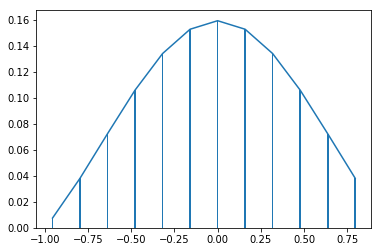

In [75]:
import matplotlib.pyplot as plt
plt.bar(xx,yy,width=0.01)
plt.plot(xx,zz)
plt.show()

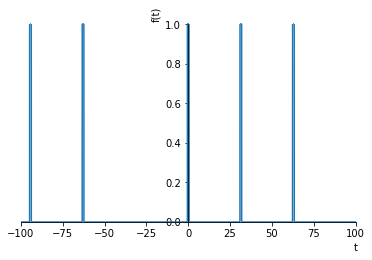

In [76]:
T=10*pi;t0=1
p=Piecewise(  (1/t0,t<t0/2) , (1/t0,t >= T-t0/2) , (0,True) )
f = lambda t: p.subs(t,abs(t)%T)
plot(f(t),(t,-100,100))

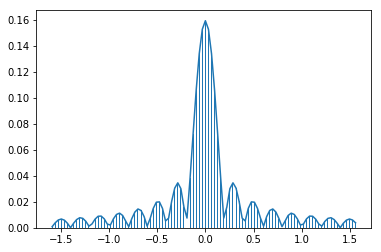

In [77]:
nu0=1/T
xx= [k*nu0 for k in range(-50,50)]
yy=[abs(cn.subs(n,k))for k in range(-50,50)]
zz=[1/(2*pi)*abs(sinc(T/2*nu*t0)) for nu in xx]
plt.bar(xx,yy,width=0.01)
plt.plot(xx,zz)
plt.show()

Pour tout $t$, on définit :
$F(\nu)= \int_{-\frac{T}{2}}^{+\frac{T}{2}}f(t) e^{-i 2 \pi \nu t}dt \times e^{i 2 \pi \nu t} $

La décomposition en série de Fourier de $f$ donne, pour tout $t$ ou $f$ est continue :
$f(t) = \sum_{n=-\infty}^{+\infty}\nu_0\times F(n\nu_0)=\int_{-\infty}^{+\infty}F(\nu)d\nu$

Dans le cas où T tend vers $+\infty$, $F(\nu)=\hat{f}(\nu)\times e^{i 2 \pi \nu t}$ donc $f(t)=\int_{-\infty}^{+\infty}\hat{f}(\nu)\times e^{i 2 \pi \nu t}d\nu$

En résumé, $f(t)$ a pour transformée de Fourier $\hat{f}(\nu)=\int_{-\infty}^{+\infty}f(t)\times e^{-i 2 \pi \nu t}dt$

et $\hat{f}(\nu)$ redonne $f(t)$ par la transformée de Fourier inverse définie par $\int_{-\infty}^{+\infty}\hat{f}(\nu)\times e^{i 2 \pi \nu t}d\nu$

Dans le cas où $t_0 \ne 0$, $\hat{f}(\nu)=\int_{-\frac{t_0}{2}}^{\frac{t_0}{2}}\frac{1}{t_0}\times e^{-i 2 \pi \nu t}dt$

In [53]:
alpha=Symbol('alpha')
expr=integrate(E**(alpha*t),t)
expr

⎧ t    for α = 0
⎪               
⎪ α⋅t           
⎨ℯ              
⎪────  otherwise
⎪ α             
⎩               

In [60]:
nu,t0=symbols('nu t0')
fchap = lambda nu: sinc(pi*nu*t0)

Quand $t_0$ tend vers 0, le signal $f(t)$ tend vers l'impulsion de Dirac $\delta$ et $\hat{f}(\nu)$ tend vers :

In [61]:
limit(fchap(nu),t0,0)

La transformée de Fourier du signal $\delta(t)$ est donc la fonction constante égale à 1 pour tout $\nu$.

La transformée de Fourier du signal δ(t-t0)  est donc la fonction égale à $e^{-i 2\pi \nu t0}$ pour tout $\nu$.

La transformée de Fourier d'un peigne de Dirac $\sum_{n=-\infty}^{+\infty}δ(t-n t_0)$ est donc la fonction égale à $\sum_{n=-\infty}^{+\infty} e^{i 2 \pi \nu n t_0}  $ pour tout ν.

In [66]:
-(3%2)